In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt

def plot_band(n, ID):

  test = pd.read_csv(f'/content/drive/MyDrive/submission/circle_{n}/real_pre/{ID}.csv', index_col=0)
  test_life = test['Y_test']
  pred_life = test['Yhat']
  print(len(test_life))
  y = np.linspace(0, 2500, num=len(test_life))
  y_low_1 = 0.9 * y
  y_high_1 = 1.1 * y
  y_low_2 = 0.8 * y
  y_high_2 = 1.2 * y

  fig, ax = plt.subplots(figsize = (6,6))
  ax.set_aspect('equal') 
  ax.scatter(test_life, pred_life, alpha=.8, color='violet')
  ax.legend([f'sliding window = {n} cycles'], loc = 'upper left', fontsize = 12, frameon=False)
  ax.fill_between(y, y_low_1, y_high_1, color='pink', alpha=.4)
  
  ax.fill_between(y, y_low_2, y_high_2, color='cyan', alpha=0.3)
  

  ax.set_xlim(-200, 2500)
  ax.set_ylim(-200, 2500)
  ax.tick_params(axis='both', which='major', labelsize=12)
  ax.set_xlabel('Remaining Cycle Life', fontsize = 12)
  ax.set_ylabel('Prediction Remaining Cycle Life', fontsize = 12)

  conf1 = (pred_life >= 0.9 * test_life) & (pred_life <= 1.1 * test_life) 
  conf2 = (pred_life >= 0.8 * test_life) & (pred_life <= 1.2 * test_life) 

  print(f'Cycle {n}, conf1.mean():', conf1.mean())
  print(f'Cycle {n}, conf2.mean():', conf2.mean())
  # conf2.mean()

def display_model(n, ID):
  print(f'best model for circle {n}')
  display(Image(f'/content/drive/MyDrive/submission/circle_{n}/model plot/{ID}.png'))

def error(n,ID):
  error = pd.read_csv(f'/content/drive/MyDrive/submission/circle_{n}/model error/{ID}.csv', index_col=0)
  er = error.loc[['train', 'test']]
  print(er)
  er.index = [f'train_{n}', f'test_{n}']
  return er


# Circle 1

best model for circle 1


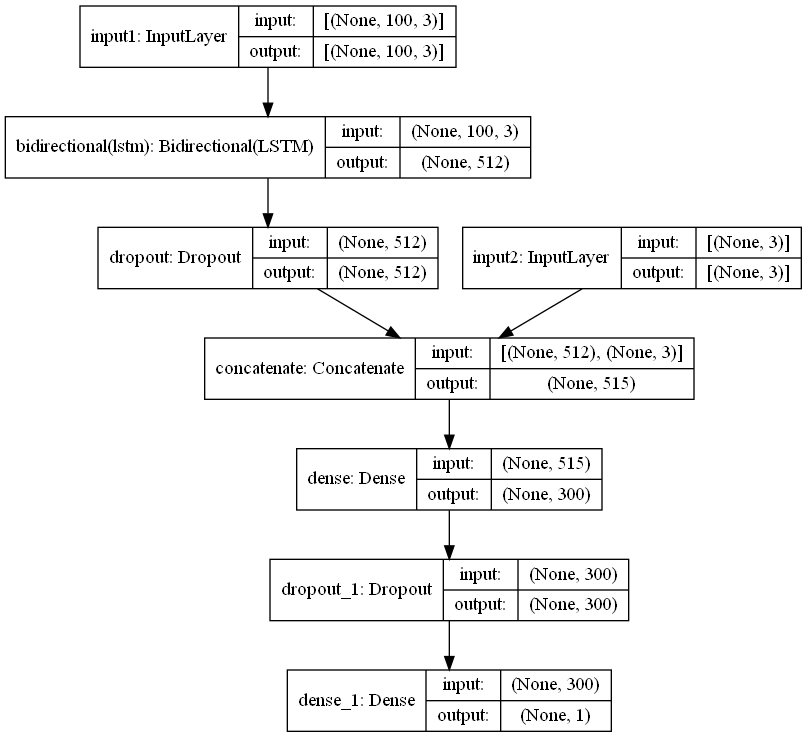

32612
Cycle 1, conf1.mean(): 0.6648166319146327
Cycle 1, conf2.mean(): 0.8687293020973874
             mae       rmse      mape        r2
train  33.271610  59.605150  0.109687  0.975912
test   38.678236  78.904327  0.120526  0.957782


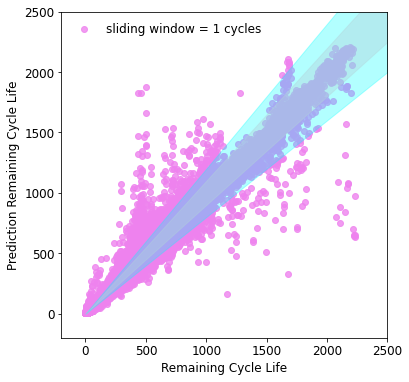

In [6]:
n = 1
ID = 11
display_model(n, ID)
plot_band(n, ID)
error1 = error(n,ID)

# Circle 5

best model for circle 5


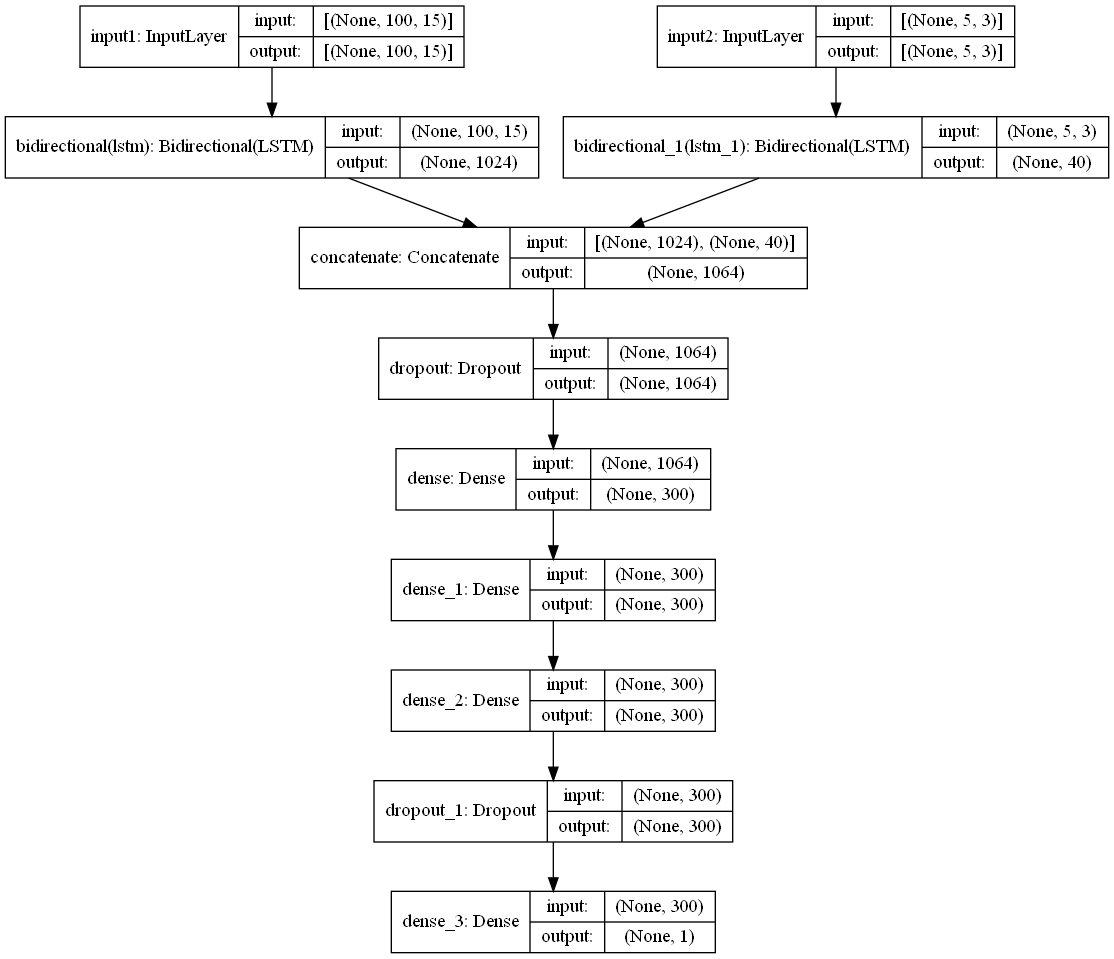

6459
Cycle 5, conf1.mean(): 0.8151416627960985
Cycle 5, conf2.mean(): 0.9266140269391546
             mae       rmse      mape        r2
train  15.986195  26.731866  0.061023  0.995062
test   22.569517  50.843110  0.074627  0.982808


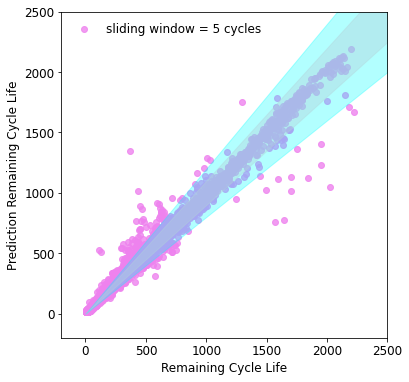

In [7]:
n = 5
ID = 10
display_model(n, ID)
plot_band(n, ID)
error5 = error(n,ID)

# Circle 10

best model for circle 10


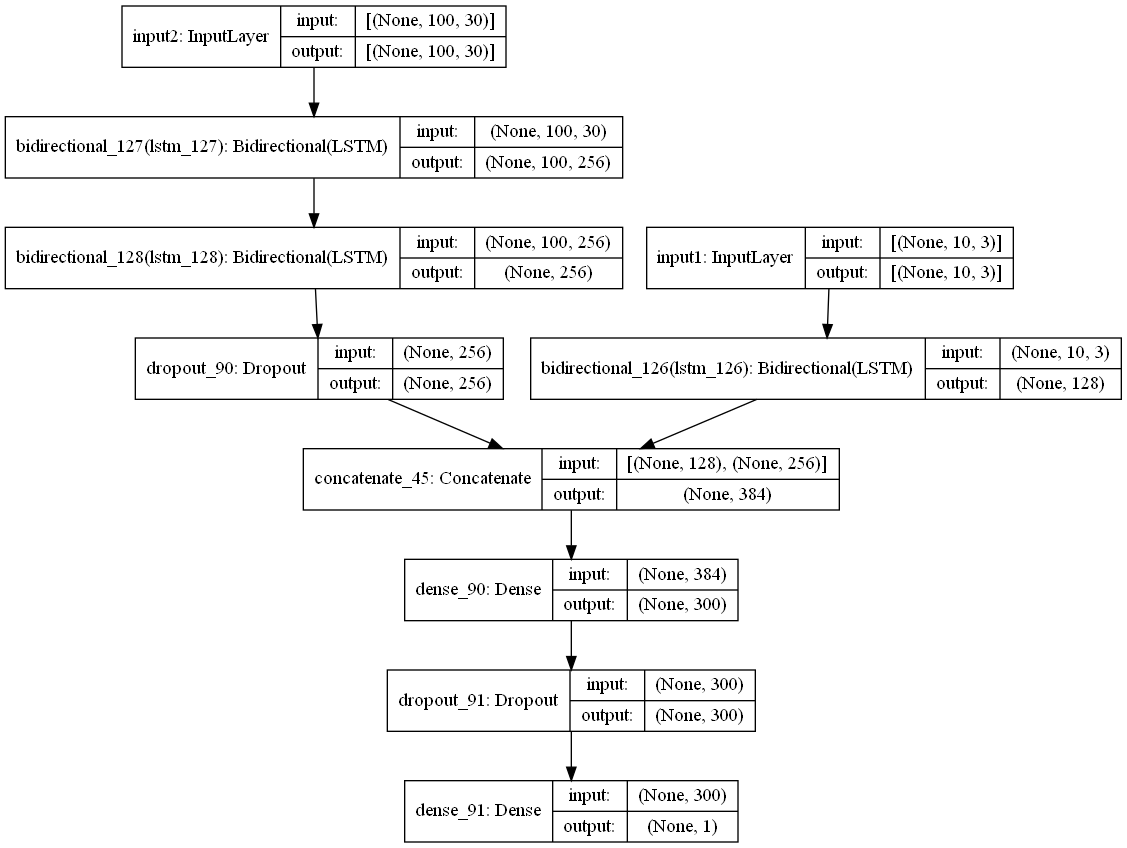

3198
Cycle 10, conf1.mean(): 0.6181988742964353
Cycle 10, conf2.mean(): 0.8455284552845529
             mae       rmse      mape        r2
train  30.217303  48.325632  0.094953  0.983701
test   40.765305  81.043891  0.116334  0.956303


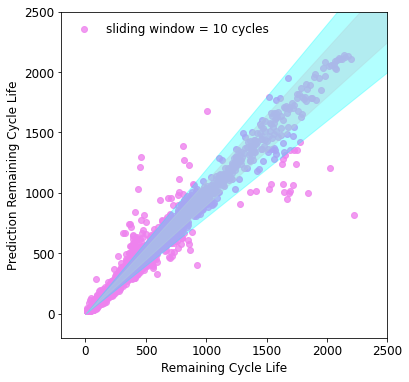

In [8]:
n = 10
ID = 15
display_model(n, ID)
plot_band(n, ID)
error10 = error(n,ID)

# Circle 20

best model for circle 20


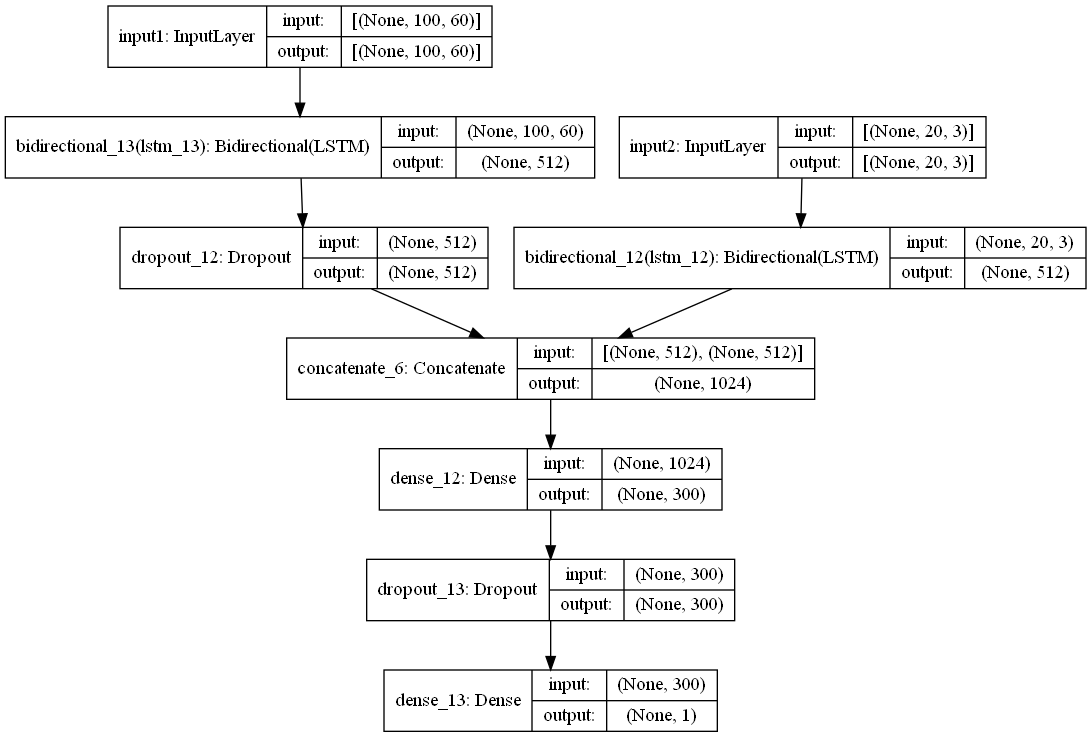

1568
Cycle 20, conf1.mean(): 0.5911989795918368
Cycle 20, conf2.mean(): 0.8309948979591837
             mae       rmse      mape        r2
train  33.698479  51.726918  0.095538  0.981329
test   45.451250  74.978440  0.118863  0.961472


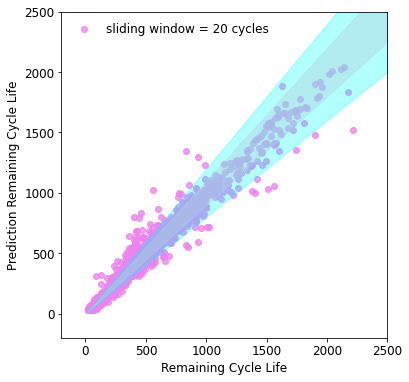

In [9]:
n = 20
ID = 15
display_model(n, ID)
plot_band(n, ID)
error20 = error(n,ID)

In [ ]:
error = pd.concat((error1, error5, error10, error20))
error

,mae,rmse,mape,r2
train_1,33.271610,59.605150,0.109687,0.975912
test_1,38.678236,78.904327,0.120526,0.957782
train_5,15.986195,26.731866,0.061023,0.995062
test_5,22.569517,50.843110,0.074627,0.982808
train_10,30.217303,48.325632,0.094953,0.983701
test_10,40.765305,81.043891,0.116334,0.956303
train_20,33.698479,51.726918,0.095538,0.981329
test_20,45.451250,74.978440,0.118863,0.961472


In [ ]:
Cycle 1, conf1.mean(): 0.6648166319146327
Cycle 1, conf2.mean(): 0.8687293020973874

Cycle 5, conf1.mean(): 0.8151416627960985
Cycle 5, conf2.mean(): 0.9266140269391546

Cycle 10, conf1.mean(): 0.6181988742964353
Cycle 10, conf2.mean(): 0.8455284552845529

Cycle 20, conf1.mean(): 0.5911989795918368
Cycle 20, conf2.mean(): 0.8309948979591837